# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

复现BFS DFS算法：

In [139]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""
import re
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location
city_info = get_city_info(coordination_source)
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [140]:
threshold = 700 
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])
from collections import defaultdict
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection
cities_connection = build_connection(city_info)
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [141]:
def bfs(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        #pop method takes an index value and checks whether the list exists, remoes the element at the index and then displays it after the removal
        print ('path is :', path)
        froniter = path[-1] #check if the last point has any connection
        
        if froniter in visited: continue
            
        successsors = graph[froniter] #get all the connected points to successors
        print ('successsors :', successsors)
        
        for city in successsors:
            print (path)
            if city in path: continue  # check loop
            print ('city', city)
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            #pathes = [new_path] + pathes #dfs
            print ('pathes :' ,pathes)
            if city == destination:
                return new_path  #当一条路是goal的时候就return
        visited.add(froniter)

In [148]:
bfs(cities_connection,"北京","上海") 
#result is ['北京', '济南', '上海']

path is : ['北京']
successsors : ['石家庄', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '长沙', '太原', '天津', '呼和浩特']
['北京']
city 石家庄
pathes : [['北京', '石家庄']]
['北京']
city 武汉
pathes : [['北京', '石家庄'], ['北京', '武汉']]
['北京']
city 郑州
pathes : [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州']]
['北京']
city 济南
pathes : [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州'], ['北京', '济南']]
['北京']
city 南京
pathes : [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京']]
['北京']
city 合肥
pathes : [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥']]
['北京']
city 杭州
pathes : [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州']]
['北京']
city 南昌
pathes : [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州'], ['北京', '南昌']]
['北京']
city 长沙
pathes : [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州'], ['北京', '南昌'], ['北京', '长沙']]
['北京']
city 太原
pathes : [['北

['北京', '济南', '上海']

In [143]:
def dfs(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        print ('path is :', path)
        froniter = path[-1] #check if the last point has any connection
        
        if froniter in visited: continue
            
        successsors = graph[froniter] #get all the connected points to successors
        print ('successsors :', successsors)
        
        for city in successsors:
            print (path)
            if city in path: continue  # check loop
            print ('city', city)
            new_path = path+[city]
            
            #pathes.append(new_path)  #bfs
            pathes = [new_path] + pathes #dfs
            print ('pathes :' ,pathes)
            if city == destination:
                return new_path  #当一条路是goal的时候就return
        visited.add(froniter)

In [146]:
dfs(cities_connection,"北京","上海") 
#Result is： ['北京', '呼和浩特', '银川', '南宁', '澳门', '香港', '长沙', '天津', '上海']

path is : ['北京']
successsors : ['石家庄', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '长沙', '太原', '天津', '呼和浩特']
['北京']
city 石家庄
pathes : [['北京', '石家庄']]
['北京']
city 武汉
pathes : [['北京', '武汉'], ['北京', '石家庄']]
['北京']
city 郑州
pathes : [['北京', '郑州'], ['北京', '武汉'], ['北京', '石家庄']]
['北京']
city 济南
pathes : [['北京', '济南'], ['北京', '郑州'], ['北京', '武汉'], ['北京', '石家庄']]
['北京']
city 南京
pathes : [['北京', '南京'], ['北京', '济南'], ['北京', '郑州'], ['北京', '武汉'], ['北京', '石家庄']]
['北京']
city 合肥
pathes : [['北京', '合肥'], ['北京', '南京'], ['北京', '济南'], ['北京', '郑州'], ['北京', '武汉'], ['北京', '石家庄']]
['北京']
city 杭州
pathes : [['北京', '杭州'], ['北京', '合肥'], ['北京', '南京'], ['北京', '济南'], ['北京', '郑州'], ['北京', '武汉'], ['北京', '石家庄']]
['北京']
city 南昌
pathes : [['北京', '南昌'], ['北京', '杭州'], ['北京', '合肥'], ['北京', '南京'], ['北京', '济南'], ['北京', '郑州'], ['北京', '武汉'], ['北京', '石家庄']]
['北京']
city 长沙
pathes : [['北京', '长沙'], ['北京', '南昌'], ['北京', '杭州'], ['北京', '合肥'], ['北京', '南京'], ['北京', '济南'], ['北京', '郑州'], ['北京', '武汉'], ['北京', '石家庄']]
['北京']
city 太原
pathes : [['北

['北京', '呼和浩特', '银川', '南宁', '澳门', '香港', '长沙', '天津', '上海']

BFS result：['北京', '济南', '上海'] <br>
DFS result：['北京', '呼和浩特', '银川', '南宁', '澳门', '香港', '长沙', '天津', '上海']

#### 2. 回答以下理论题目

###### 2.1 What conditions are required to make the BFS return the optimal solution ?
All costs between two nodes are positive or zero.

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)
Set a limit of the depth while search

https://blog.csdn.net/silangquan/article/details/40516625

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
Queue data structure is used in BFS. On the other hand, DFS uses stack or recursion. Memory space is efficiently utilized in DFS while space utilization in BFS is not effective. BFS is optimal algorithm while DFS is not optimal.
DFS yields deeper solutions and is not optimal, but it works well when the solution is dense whereas BFS is optimal which searches the optimal goal at first.

##### 2.4 When can we use machine learning ?
You cannot code the rules: Many human tasks (such as recognizing whether an email is spam or not spam) cannot be adequately solved using a simple (deterministic), rule-based solution. 

##### 2.5 What is the gradient of a function ?
The gradient is a fancy word for derivative, or the rate of change of a function. 

##### 2.6 How can we find the maximum value of a function using the information of gradient ?
The first step is to determine whether the function has a maximum or minimum. Then use gradient desent to find the x value that result the max or min value of the function by setup graident = 0.

#### 3. 实践部分  寻找地铁路线

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [14]:
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request
import json

html = urllib.request.urlopen('http://map.baidu.com/?qt=subwayscity&t=123457788').read()
soup = BeautifulSoup(html, 'html.parser')
texts = soup.findAll(text=True)
# print(type(texts))
# print(texts)
texts =str(texts[0])
# print (type(texts))
texts 


'{\n    "result": {\n        "type": "921",\n        "error": "0",\n        "subwayVersion": "20191108"\n    },\n    "subways_city": {\n        "cities": [\n            {\n                "cn_name": "北京市",\n                "cename": "beijing",\n                "code": 131,\n                "cpre": "bj"\n            },\n            {\n                "cn_name": "上海市",\n                "cename": "shanghai",\n                "code": 289,\n                "cpre": "shh",\n                "cxfDis": 0\n            },\n            {\n                "cn_name": "广州市",\n                "cename": "guangzhou",\n                "code": 257,\n                "cpre": "gzh"\n            },\n            {\n                "cn_name": "深圳市",\n                "cename": "shenzhen",\n                "code": 340,\n                "cpre": "szh"\n            },\n            {\n                "cn_name": "重庆市",\n                "cename": "chongqing",\n                "code": 132,\n                "cpre": "chq"\

In [16]:
import re
def get_city_info(a):
    city_code = {}
    for line in a.split("\n"):
        if "cn_name" in line:
            city = re.findall("\w+",line)[1]
            #print (city)
        if "code" in line:
            code= re.findall("\d+",line)[0]
            #print (code)
            city_code[city] = code
    return city_code

city_code_mapping=get_city_info(texts)

### I have tested that the above URL only works for City in China.

In [17]:
city_code_mapping

{'北京市': '131',
 '上海市': '289',
 '广州市': '257',
 '深圳市': '340',
 '重庆市': '132',
 '天津市': '332',
 '石家庄市': '150',
 '南京市': '315',
 '成都市': '75',
 '沈阳市': '58',
 '杭州市': '179',
 '武汉市': '218',
 '长沙市': '158',
 '苏州市': '224',
 '大连市': '167',
 '长春市': '53',
 '西安市': '233',
 '昆明市': '104',
 '佛山市': '138',
 '哈尔滨市': '48',
 '郑州市': '268',
 '宁波市': '180',
 '无锡市': '317',
 '温州市': '178',
 '常州市': '348',
 '青岛市': '236',
 '济南市': '288',
 '南昌市': '163',
 '福州市': '300',
 '东莞市': '119',
 '南宁市': '261',
 '合肥市': '127',
 '厦门市': '194',
 '乌鲁木齐市': '92',
 '贵阳市': '146',
 '兰州市': '36',
 '徐州市': '316',
 '香港特别行政区': '2912',
 '台北市': '9002',
 '高雄市': '9019',
 '新加坡': '20001',
 '曼谷': '20508',
 '名古屋': '26001',
 '横滨': '26019',
 '京都': '26022',
 '大阪': '26033',
 '东京': '26041',
 '釜山': '30001',
 '大邱': '30004',
 '大田': '30005',
 '光州': '30007',
 '首尔': '30016',
 '巴黎': '49872',
 '里约热内卢': '39816',
 '巴西利亚': '53009',
 '圣保罗': '39817',
 '纽约': '60732',
 '莫斯科': '65531',
 '斯德哥尔摩': '51758',
 '罗马': '50059',
 '鹿特丹': '52390',
 '伦敦': '51442',
 '布鲁塞尔': '50303',
 '奥斯陆': '521

In [18]:
def get_subway_data(city_name='北京市'):
    city_code=city_code_mapping[city_name]
    html2_link='http://map.baidu.com/?qt=bsi&c='+city_code+'&t=123457788'
    print (html2_link)

    html2 = urllib.request.urlopen(html2_link).read()
    soup = BeautifulSoup(html2, 'html.parser')
    texts = soup.findAll(text=True)
    texts=str(texts[0])
    print(texts[:100])

    subway_data = json.loads(texts)
    print (subway_data['content'][1]['stops'])
    return subway_data

### Input the city name for subway info 
### 输入想要查询的地铁城市的名字，test过只支持中国城市

In [19]:
subway_data=get_subway_data(city_name='杭州市')

http://map.baidu.com/?qt=bsi&c=179&t=123457788
{"content":[{"line_name":"\u5730\u94c15\u53f7\u7ebf(\u826f\u7766\u8def-\u5584\u8d24)","line_uid":"8a
[{'is_practical': 0, 'name': '浦沿', 'uid': 'ceb41c58739e1aac45e274df', 'x': 13376260.9, 'y': 3503231.93}, {'is_practical': 1, 'name': '杨家墩', 'uid': '992e4565df74bcd0ab175af9', 'x': 13375780.12, 'y': 3504248.54}, {'is_practical': 1, 'name': '中医药大学', 'uid': '4c7a17c759c43367da2f2849', 'x': 13375496.94, 'y': 3505285.97}, {'is_practical': 1, 'name': '联庄', 'uid': '8475a7507d52620488f15de9', 'x': 13376136.83, 'y': 3506642.01}, {'is_practical': 1, 'name': '水澄桥', 'uid': '880c8f233df57b6fb020a86a', 'x': 13376130.42, 'y': 3508870.11}, {'is_practical': 1, 'name': '复兴路', 'uid': 'cec367ccaa5ef42707026f6e', 'x': 13377423.49, 'y': 3509642.08}, {'is_practical': 0, 'name': '南星桥', 'uid': 'e3a39be7e73f643eb35c6a3a', 'x': 13378990.32, 'y': 3510547.6}, {'is_practical': 1, 'name': '甬江路', 'uid': '870cc07ed3a7b9f3aeb22a61', 'x': 13380370.2, 'y': 3511370.54}, {'is_p

In [20]:
subway_data['content'][1]['stops']

[{'is_practical': 0,
  'name': '浦沿',
  'uid': 'ceb41c58739e1aac45e274df',
  'x': 13376260.9,
  'y': 3503231.93},
 {'is_practical': 1,
  'name': '杨家墩',
  'uid': '992e4565df74bcd0ab175af9',
  'x': 13375780.12,
  'y': 3504248.54},
 {'is_practical': 1,
  'name': '中医药大学',
  'uid': '4c7a17c759c43367da2f2849',
  'x': 13375496.94,
  'y': 3505285.97},
 {'is_practical': 1,
  'name': '联庄',
  'uid': '8475a7507d52620488f15de9',
  'x': 13376136.83,
  'y': 3506642.01},
 {'is_practical': 1,
  'name': '水澄桥',
  'uid': '880c8f233df57b6fb020a86a',
  'x': 13376130.42,
  'y': 3508870.11},
 {'is_practical': 1,
  'name': '复兴路',
  'uid': 'cec367ccaa5ef42707026f6e',
  'x': 13377423.49,
  'y': 3509642.08},
 {'is_practical': 0,
  'name': '南星桥',
  'uid': 'e3a39be7e73f643eb35c6a3a',
  'x': 13378990.32,
  'y': 3510547.6},
 {'is_practical': 1,
  'name': '甬江路',
  'uid': '870cc07ed3a7b9f3aeb22a61',
  'x': 13380370.2,
  'y': 3511370.54},
 {'is_practical': 0,
  'name': '近江',
  'uid': '71f9e3c69ff76fed94ec84a2',
  'x': 13

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

stops_info={}
stops_names=[]
for a in range(len(subway_data['content'])):
    #stops_names.append(subway_data['content'][a]["line_name"])
    stops_names.append("line_start")
    for i in subway_data['content'][a]['stops']:
        stops_info[i['name']]=(i['x'],i['y'])
        stops_names.append(i['name'])
    stops_names.append('line_end')
stops_info

{'良睦路': (13360000.57, 3519383.67),
 '杭师大仓前': (13361109.26, 3519755.66),
 '永福': (13362195.98, 3520099.38),
 '五常': (13364269.93, 3520675.3),
 '蒋村': (13366798.97, 3520480.38),
 '浙大紫金港': (13367809.11, 3520398.59),
 '三坝': (13370164.58, 3521224.95),
 '萍水街': (13371727.21, 3521589.29),
 '和睦': (13372466.48, 3522304.94),
 '大运河': (13373871.8, 3523704.21),
 '拱宸桥东': (13375673.92, 3523374.35),
 '善贤': (13376982.3, 3523298.48),
 '浦沿': (13376260.9, 3503231.93),
 '杨家墩': (13375780.12, 3504248.54),
 '中医药大学': (13375496.94, 3505285.97),
 '联庄': (13376136.83, 3506642.01),
 '水澄桥': (13376130.42, 3508870.11),
 '复兴路': (13377423.49, 3509642.08),
 '南星桥': (13378990.32, 3510547.6),
 '甬江路': (13380370.2, 3511370.54),
 '近江': (13381183.53, 3512328.83),
 '城星路': (13382247.45, 3513443.67),
 '市民中心': (13382735.33, 3514119.31),
 '江锦路': (13383186.1, 3514744.26),
 '钱江路': (13383011.69, 3515511.07),
 '景芳': (13382334.42, 3516822.63),
 '新塘': (13382285.32, 3518128.2),
 '新风': (13382327, 3519546.73),
 '火车东站': (13382943.08, 3520072.59),

In [41]:
stops_names

['line_start',
 '良睦路',
 '杭师大仓前',
 '永福',
 '五常',
 '蒋村',
 '浙大紫金港',
 '三坝',
 '萍水街',
 '和睦',
 '大运河',
 '拱宸桥东',
 '善贤',
 'line_end',
 'line_start',
 '浦沿',
 '杨家墩',
 '中医药大学',
 '联庄',
 '水澄桥',
 '复兴路',
 '南星桥',
 '甬江路',
 '近江',
 '城星路',
 '市民中心',
 '江锦路',
 '钱江路',
 '景芳',
 '新塘',
 '新风',
 '火车东站',
 '彭埠',
 'line_end',
 'line_start',
 '彭埠',
 '火车东站',
 '新风',
 '新塘',
 '景芳',
 '钱江路',
 '江锦路',
 '市民中心',
 '城星路',
 '近江',
 '甬江路',
 '南星桥',
 '复兴路',
 '水澄桥',
 '联庄',
 '中医药大学',
 '杨家墩',
 '浦沿',
 'line_end',
 'line_start',
 '朝阳',
 '曹家桥',
 '潘水',
 '人民路',
 '杭发厂',
 '人民广场',
 '建设一路',
 '建设三路',
 '振宁路',
 '飞虹路',
 '盈丰路',
 '钱江世纪城',
 '钱江路',
 '庆春广场',
 '庆菱路',
 '建国北路',
 '中河北路',
 '凤起路',
 '武林门',
 '沈塘桥',
 '学院路',
 '古翠路',
 '丰潭路',
 '文新',
 '三坝',
 '虾龙圩',
 '三墩',
 '墩祥街',
 '金家渡',
 '白洋',
 '杜甫村',
 '良渚',
 'line_end',
 'line_start',
 '良渚',
 '杜甫村',
 '白洋',
 '金家渡',
 '墩祥街',
 '三墩',
 '虾龙圩',
 '三坝',
 '文新',
 '丰潭路',
 '古翠路',
 '学院路',
 '沈塘桥',
 '武林门',
 '凤起路',
 '中河北路',
 '建国北路',
 '庆菱路',
 '庆春广场',
 '钱江路',
 '钱江世纪城',
 '盈丰路',
 '飞虹路',
 '振宁路',
 '建设三路',
 '建设一路',
 '人民广场',
 '杭发厂',
 '人民路',
 '潘水

90
90


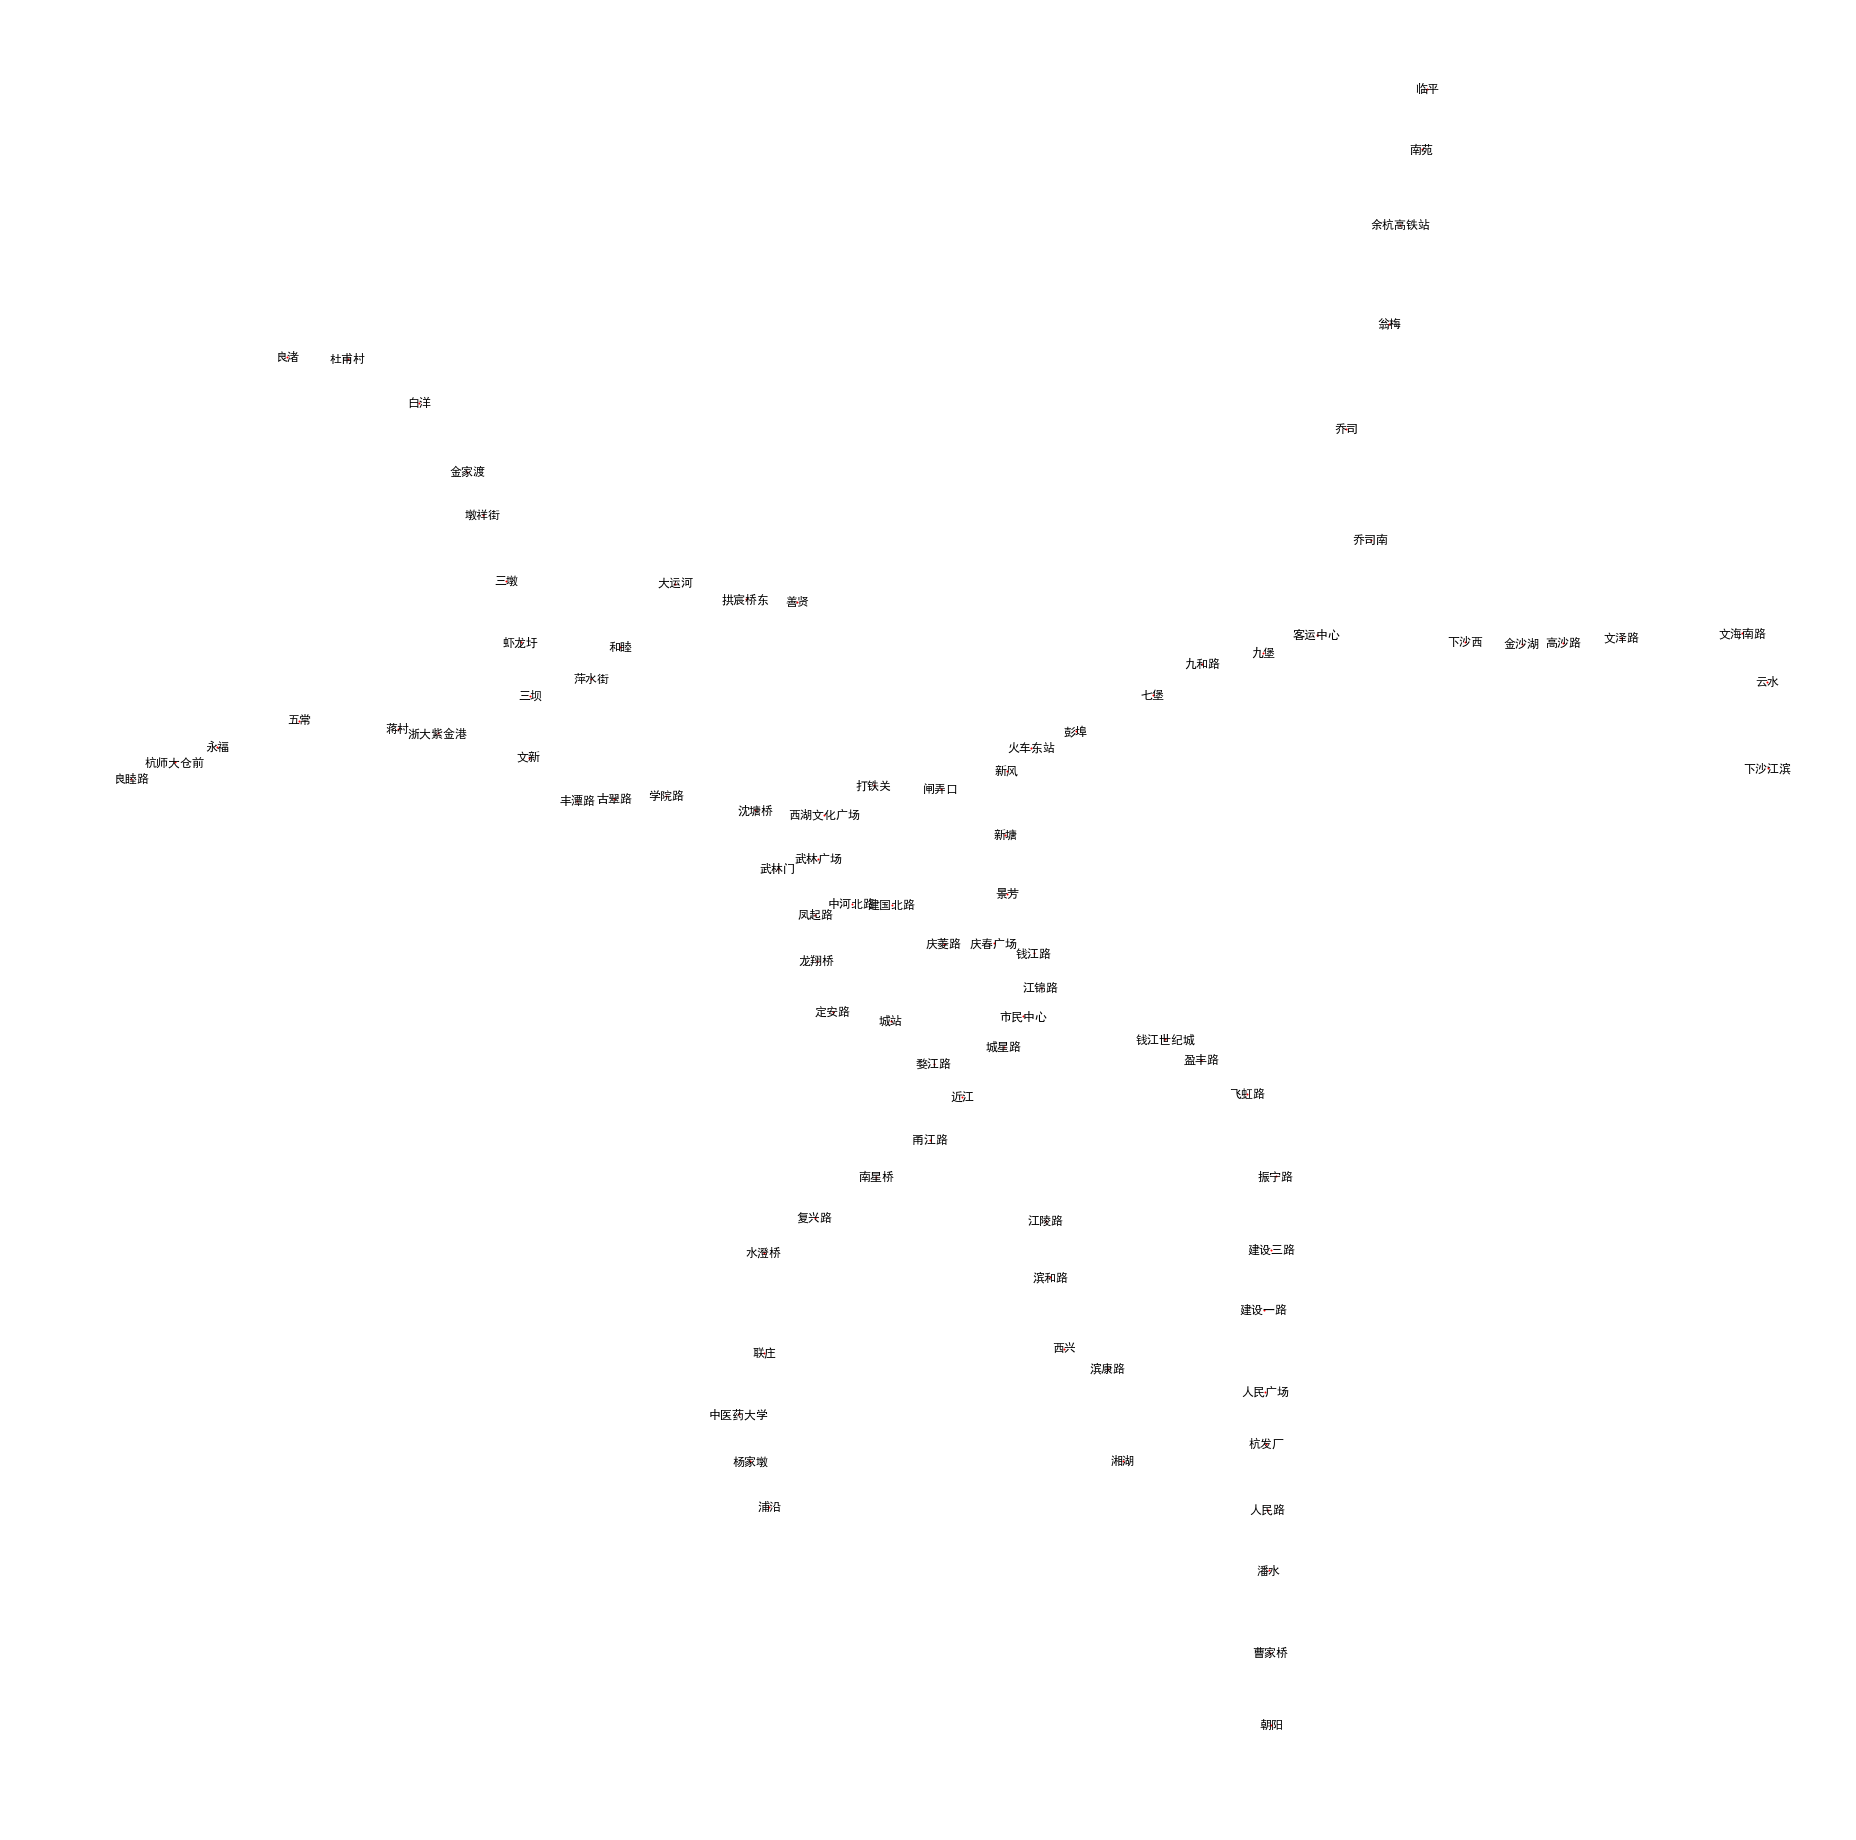

In [42]:
print (len(stops_info.keys()))
print (len(set(stops_info.keys())))
# from matplotlib import font_manager
# my_font=font_manager.FontProperties(fname='/Users/zixiawang/Library/Fonts/SimHei.ttf')

f=plt.figure(figsize=(25,25))#指定figure的宽和高，单位为英寸

#plt.title('测试一下',fontproperties=my_font)

import matplotlib.pyplot as mpl
#为了避免window下绘图中文显示不出来，补充下面代码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

stops_graph = nx.Graph()
stops_graph.add_nodes_from(list(stops_info.keys()))
nx.draw(stops_graph, stops_info, with_labels=True, node_size=1,font_zie=20)

In [45]:
stops_connection={}
for i, name in enumerate(stops_names[:-1]):
    connected_list=[]
    connected_list.append(stops_names[i-1])
    connected_list.append(stops_names[i+1])
    if name not in stops_connection.keys():
        stops_connection[name]=connected_list
    else:
        stops_connection[name].append(stops_names[i-1])
        stops_connection[name].append(stops_names[i+1])
print(stops_connection)  

{'line_start': ['line_end', '良睦路', 'line_end', '浦沿', 'line_end', '彭埠', 'line_end', '朝阳', 'line_end', '良渚', 'line_end', '善贤', 'line_end', '湘湖', 'line_end', '临平', 'line_end', '下沙江滨', 'line_end', '湘湖'], '良睦路': ['line_start', '杭师大仓前', '杭师大仓前', 'line_end'], '杭师大仓前': ['良睦路', '永福', '永福', '良睦路'], '永福': ['杭师大仓前', '五常', '五常', '杭师大仓前'], '五常': ['永福', '蒋村', '蒋村', '永福'], '蒋村': ['五常', '浙大紫金港', '浙大紫金港', '五常'], '浙大紫金港': ['蒋村', '三坝', '三坝', '蒋村'], '三坝': ['浙大紫金港', '萍水街', '文新', '虾龙圩', '虾龙圩', '文新', '萍水街', '浙大紫金港'], '萍水街': ['三坝', '和睦', '和睦', '三坝'], '和睦': ['萍水街', '大运河', '大运河', '萍水街'], '大运河': ['和睦', '拱宸桥东', '拱宸桥东', '和睦'], '拱宸桥东': ['大运河', '善贤', '善贤', '大运河'], '善贤': ['拱宸桥东', 'line_end', 'line_start', '拱宸桥东'], 'line_end': ['善贤', 'line_start', '彭埠', 'line_start', '浦沿', 'line_start', '良渚', 'line_start', '朝阳', 'line_start', '良睦路', 'line_start', '临平', 'line_start', '湘湖', 'line_start', '湘湖', 'line_start'], '浦沿': ['line_start', '杨家墩', '杨家墩', 'line_end'], '杨家墩': ['浦沿', '中医药大学', '中医药大学', '浦沿'], '中医药大学': ['杨家墩', '联庄', '联庄'

In [47]:
stops_connection_deup={}
for a in stops_connection.keys():
    c_values=list(set(stops_connection[a]))
    try:
        c_values.remove('line_start')
        c_values.remove('line_end')
    except:
        pass
    stops_connection_deup[a]=c_values

del stops_connection_deup['line_start']
del stops_connection_deup['line_end']
stops_connection_deup

{'良睦路': ['杭师大仓前'],
 '杭师大仓前': ['永福', '良睦路'],
 '永福': ['杭师大仓前', '五常'],
 '五常': ['永福', '蒋村'],
 '蒋村': ['五常', '浙大紫金港'],
 '浙大紫金港': ['三坝', '蒋村'],
 '三坝': ['文新', '萍水街', '虾龙圩', '浙大紫金港'],
 '萍水街': ['三坝', '和睦'],
 '和睦': ['萍水街', '大运河'],
 '大运河': ['拱宸桥东', '和睦'],
 '拱宸桥东': ['善贤', '大运河'],
 '善贤': ['拱宸桥东'],
 '浦沿': ['杨家墩'],
 '杨家墩': ['浦沿', '中医药大学'],
 '中医药大学': ['联庄', '杨家墩'],
 '联庄': ['水澄桥', '中医药大学'],
 '水澄桥': ['联庄', '复兴路'],
 '复兴路': ['水澄桥', '南星桥'],
 '南星桥': ['甬江路', '复兴路'],
 '甬江路': ['南星桥', '近江'],
 '近江': ['甬江路', '城星路', '江陵路', '婺江路'],
 '城星路': ['市民中心', '近江'],
 '市民中心': ['城星路', '江锦路'],
 '江锦路': ['市民中心', '钱江路'],
 '钱江路': ['景芳', '钱江世纪城', '庆春广场', '江锦路'],
 '景芳': ['新塘', '钱江路'],
 '新塘': ['景芳', '新风'],
 '新风': ['新塘', '火车东站'],
 '火车东站': ['新风', '闸弄口', '彭埠'],
 '彭埠': ['七堡', '火车东站'],
 '朝阳': ['曹家桥'],
 '曹家桥': ['潘水', '朝阳'],
 '潘水': ['人民路', '曹家桥'],
 '人民路': ['潘水', '杭发厂'],
 '杭发厂': ['人民路', '人民广场'],
 '人民广场': ['建设一路', '杭发厂'],
 '建设一路': ['建设三路', '人民广场'],
 '建设三路': ['建设一路', '振宁路'],
 '振宁路': ['建设三路', '飞虹路'],
 '飞虹路': ['盈丰路', '振宁路'],
 '盈丰路': ['钱江世纪城', '飞虹路'

H:\soft\anconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


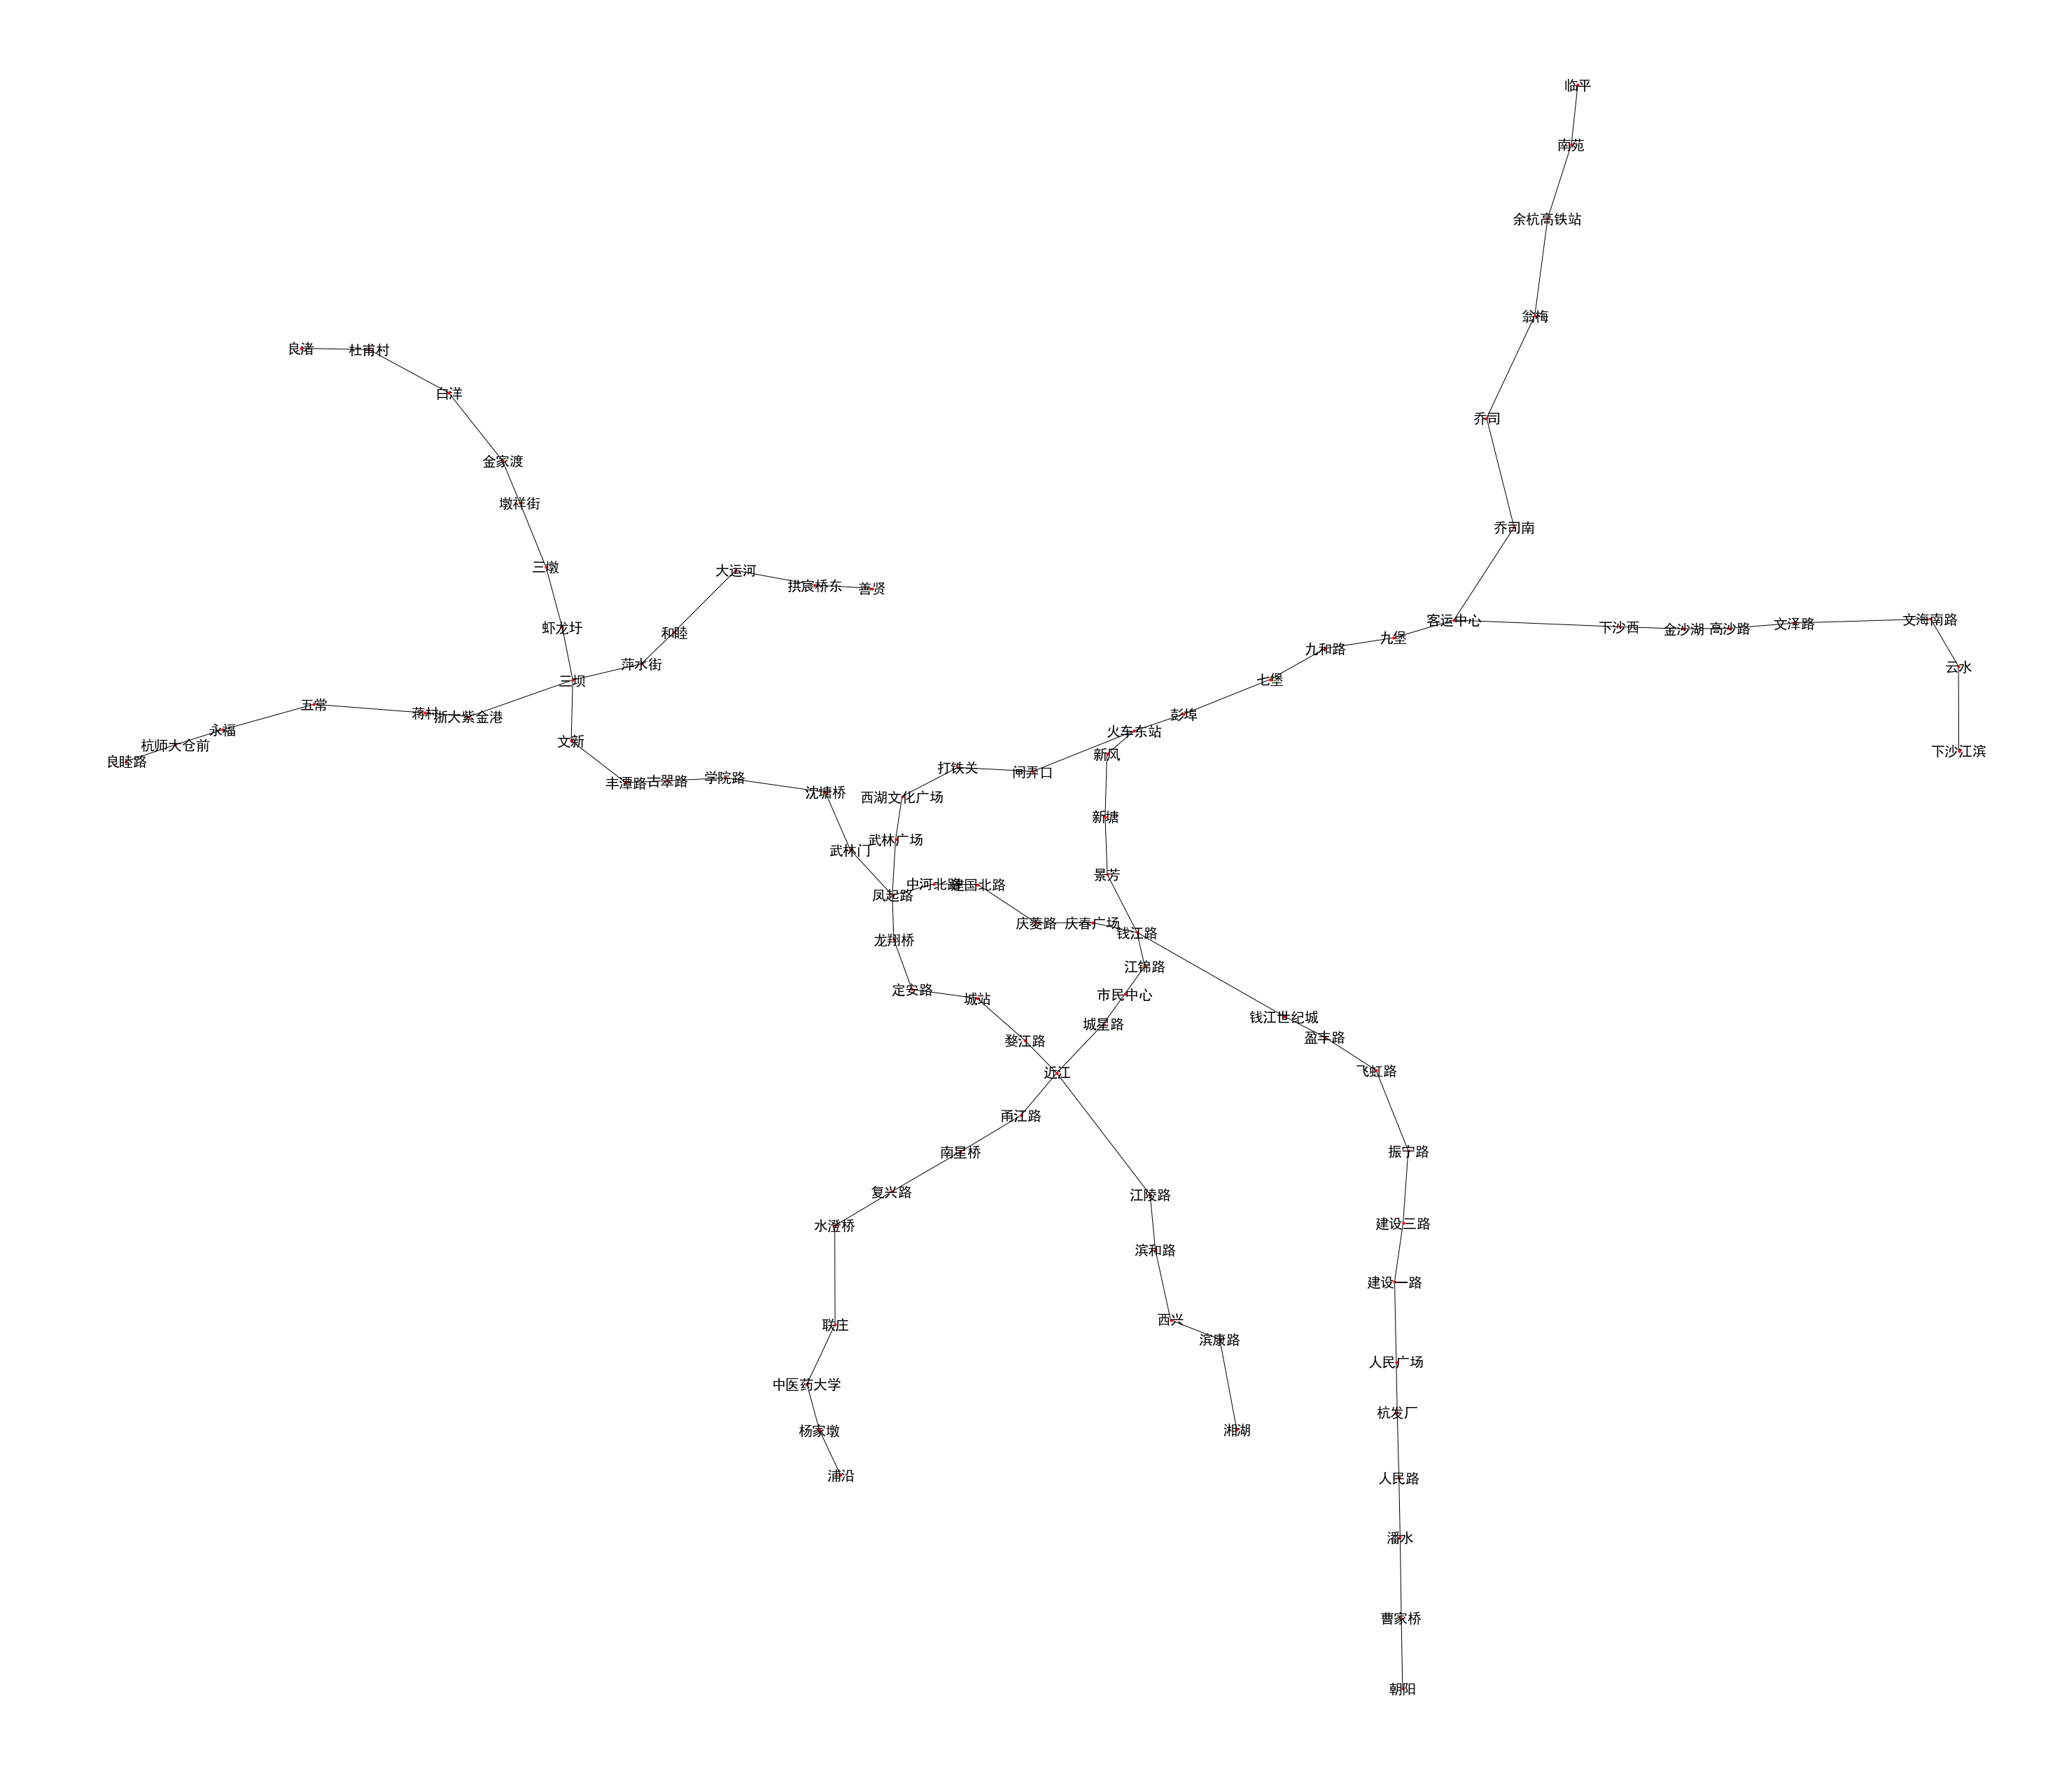

In [48]:
stops_connection_graph = nx.Graph(stops_connection_deup)
f=plt.figure(figsize=(40,35))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
nx.draw(stops_connection_graph,stops_info,with_labels=True,node_size=10,font_size=20)

#### 3. Build the search agent

In [49]:
## BFS search
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1] #check if the last point has any connection
        
        if froniter in visited: continue
            
        successsors = graph[froniter] #get all the connected points to successors
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:
                return new_path  #当一条路是goal的时候就return
        visited.add(froniter)

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [50]:
search_1(stops_connection_deup,"凤起路","市民中心")

['凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江', '城星路', '市民中心']

In [103]:
#search_1(stops_connection_deup,"西四","灯市口")

['西四', '平安里', '北海北', '南锣鼓巷', '东四', '灯市口']

In [104]:
#search_1(stops_connection_deup,"奥体中心","天安门东")

['奥体中心',
 '北土城',
 '安华桥',
 '安德里北街',
 '鼓楼大街',
 '什刹海',
 '南锣鼓巷',
 '东四',
 '灯市口',
 '东单',
 '王府井',
 '天安门东']

In [105]:
#search_1(stops_connection_deup,"奥体中心","天安门西")

['奥体中心',
 '北土城',
 '安华桥',
 '安德里北街',
 '鼓楼大街',
 '积水潭',
 '西直门',
 '车公庄',
 '阜成门',
 '复兴门',
 '西单',
 '天安门西']

In [106]:
#search_1(stops_connection_deup,"北京南站","大红门南")

['北京南站', '永定门外', '木樨园', '海户屯', '大红门南']

### (Optional) Improve your agent to make it able to find a path based on different strategies

Some ideas you might want to try:

a. Find the shortest path between two stations.

In [58]:
import math
###origin and destination are tuples of lat, lng
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [61]:
##bfs with search_strategy
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()  #为了提高效率而已， 不是必要的
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        #if froniter in visited : continue
        #if froniter == destination:
        #    return path
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
    
        #print ('pathes are:' )
        #print (pathes)
        pathes = search_strategy(pathes) #sorted the list and if the last point is the goal return the result
        #print ('processed pathes are:')
        #print (pathes)
        visited.add(froniter)
        if pathes and (destination == pathes[0][-1]):##这条路经过重排之后是最短的，而且最后一个点是终点 
#             print(pathes)
            return pathes[0]  
        

In [54]:
#search_2(stops_connection_deup,"凤起路","市民中心")

TypeError: search_2() missing 1 required positional argument: 'search_strategy'

In [59]:
def get_city_distance(city1,city2):
    return geo_distance(stops_info[city1],stops_info[city2])

#get_city_distance("奥体中心","天安门西")
get_city_distance("建国北路","近江")

5706.560845456171

In [56]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [111]:
#test case for beijing
#get_distance_of_path(['西四', '平安里', '北海北', '南锣鼓巷', '东四', '灯市口'])

43183.48163493726

In [123]:
get_distance_of_path(['建国北路', '庆菱路', '庆春广场', '钱江路', '江锦路', '市民中心','城星路', '近江'])

76423.58085268507

In [26]:
get_distance_of_path(['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'])

53514.7802825897

In [112]:
#test case for beijing
#search_2(stops_connection,"西四","灯市口",search_strategy=lambda x:x)

['西四', '平安里', '北海北', '南锣鼓巷', '东四', '灯市口']

#### search_2 with sort_by_distance gives the shortest distance path

In [60]:
search_2(stops_connection,"建国北路","近江",search_strategy=sort_by_distance)
# you can also use other sort function

[['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江'], ['建国北路', '中河北

['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江']

b. Find the path that requires minimum transfers between two stations.

In [125]:
def get_transfers_of_path(path):
    #print (len(path))
    return len(path)

def sort_by_transfers(pathes):
    return sorted(pathes,key=get_transfers_of_path)

search_2(stops_connection,"建国北路","近江",search_strategy=sort_by_transfers)

['建国北路', '庆菱路', '庆春广场', '钱江路', '江锦路', '市民中心', '城星路', '近江']

c. Combine the previous two ideas, find a more suitable path.

### find the path with the min # of transfer, if there are multiple paths with same number of transfer, pick the one with the shortest distance

In [129]:
##bfs with search_strategy
def search_3(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()  #为了提高效率而已， 不是必要的
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue
        if froniter == destination:
            return path
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            if new_path not in pathes:#bfs
                pathes.append(new_path)
            else:
                pass
    
        #print ('pathes are:' )
        #print (pathes)
        
        visited.add(froniter)
        #print (pathes)
        #print ('one loop')
        if pathes and (destination == pathes[0][-1]):##这条路经过重排之后是最短的，而且最后一个点是终点
            #only keep paths that the last stop is the destination
            filtered_pathes=[a for a in pathes if a[-1]==destination]
            
            #sorted the qualified paths by # of transfer
            filtered_pathes= sort_by_transfers(filtered_pathes) 
            routes_transfers=[]
            for a in filtered_pathes:
                routes_transfers.append(len(a))
            min_transfer=min(routes_transfers)
            
            #Then sorted the paths with same number of min # of transfer by distance
            routes_with_min_transfer=[]
            for a in filtered_pathes:
                if len(a)==min_transfer:
                    routes_with_min_transfer.append(a)
            print ('The following route/routes have the min # of transfers: ', routes_with_min_transfer)
            final_route=sort_by_distance(routes_with_min_transfer)
            
            return print ('Best path with min number of transfer first and then have theshortest distance:', final_route[0])

In [130]:
search_3(stops_connection,"建国北路","近江",search_strategy=sort_by_transfers)

The following route/routes have the min # of transfers:  [['建国北路', '庆菱路', '庆春广场', '钱江路', '江锦路', '市民中心', '城星路', '近江'], ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江']]
Best path is : ['建国北路', '中河北路', '凤起路', '龙翔桥', '定安路', '城站', '婺江路', '近江']


Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 